In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal
plt.style.use('science')
plt.style.use('notebook')
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [6]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"


In [21]:
rcb_stars = ["IRAS 1813+", "NSV11154","ASAS-RCB-18", "WISEJ1942", "WISE222", "AOHer", "ASAS-RCB-21"]
rcb_data = {}
for star in rcb_stars:
    if rcb_stars.index(star) > 0:
        observed_file = f"{observed_path}/{star}.txt"
        observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        fs = 1/(obs_flux[1000] - obs_flux[999])
        fs = 100000
        fc = 12000  # Cut-off frequency of the filter
        w = fc / (fs / 2) # Normalize the frequency
        try:
            b, a = signal.butter(5, w, 'low')
            obs_flux = signal.filtfilt(b, a, obs_flux)
            obs_err = signal.filtfilt(b, a, obs_err)
        except:
            print(f"Failed to filter {star}")
            print(fs)
        rcb_data[star] = [obs_wave/1e4, obs_flux, obs_err]


In [22]:
wave, flux, err = rcb_data[star]
cont_regions = np.where(np.logical_and(flux<1.1, flux>0.95))

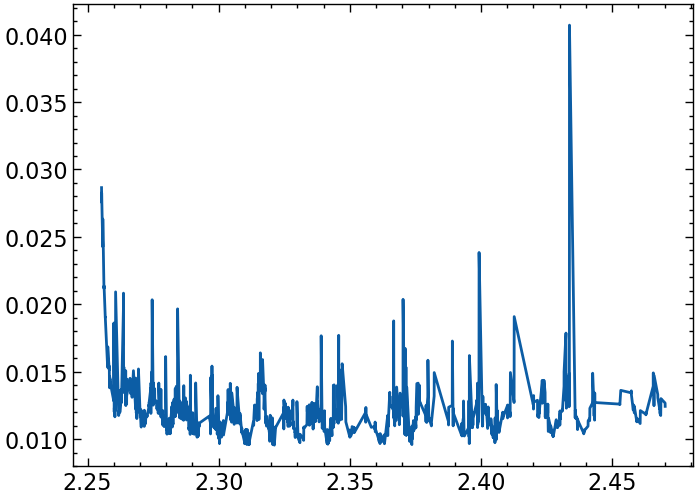

In [23]:
plt.plot(wave[cont_regions], err[cont_regions]/flux[cont_regions])

NSV11154 37.0
ASAS-RCB-18 79.0
WISEJ1942 98.0
WISE222 68.0
AOHer 69.0
ASAS-RCB-21 81.0


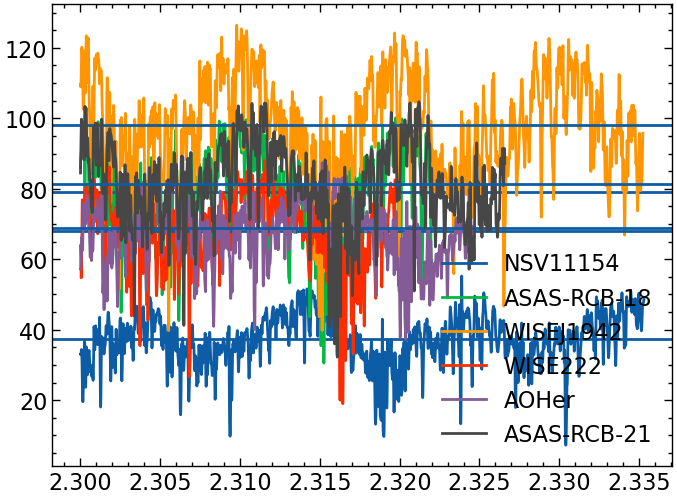

In [65]:
for star in rcb_stars[1:]:
    wave, flux, err = rcb_data[star]
    mask = (wave > 2.3) & (wave < 2.4)
    wave, flux, err = wave[mask], flux[mask], err[mask]
    cont_regions = np.where(np.logical_and(flux<1.05, flux>0.9))[0]
    cont_regions = np.where(np.logical_and(cont_regions, wave[cont_regions]>2.3))[0]
    plt.plot(wave[cont_regions], flux[cont_regions]/err[cont_regions], label = star)
    plt.axhline(np.median(flux[cont_regions]/err[cont_regions]))
    print(star, (np.median(flux[cont_regions]/err[cont_regions])).round(0) )
plt.legend()
# plt.ylim(10,150)
# plt.xlim(2.3, 2.4)

In [67]:
hdc_stars = ["HD182040", "B42","C38",  "A223", "B566", "HD137613"]
hdc_data = {}
for star in hdc_stars:
    if hdc_stars.index(star) > 0:
        observed_file = f"{observed_path}/{star}.txt"
        observed_data = np.loadtxt(observed_file, unpack=True)
        obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]
        idxs = np.where(obs_flux < 1.1)
        obs_wave = obs_wave[idxs]
        obs_flux = obs_flux[idxs]
        obs_err = obs_err[idxs]
        fs = 1/(obs_flux[1000] - obs_flux[999])
        fs = 100000
        fc = 12000  # Cut-off frequency of the filter
        w = fc / (fs / 2) # Normalize the frequency
        try:
            b, a = signal.butter(5, w, 'low')
            obs_flux = signal.filtfilt(b, a, obs_flux)
            obs_err = signal.filtfilt(b, a, obs_err)
        except:
            print(f"Failed to filter {star}")
            print(fs)
        hdc_data[star] = [obs_wave/1e4, obs_flux, obs_err]

B42 21.0
C38 72.0
A223 74.0
B566 46.0
HD137613 104.0


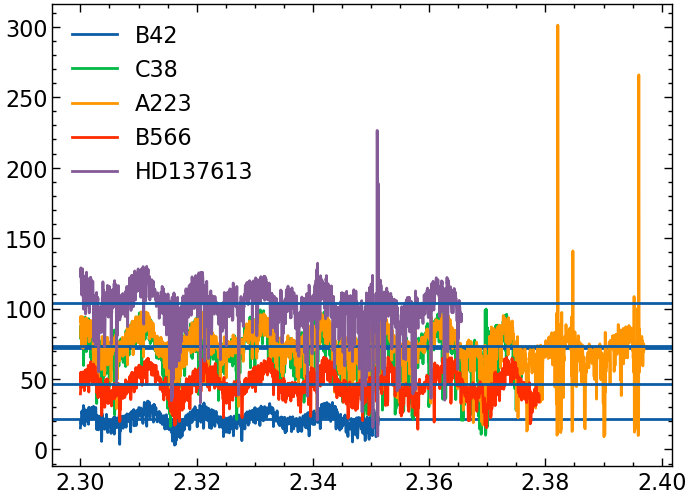

In [70]:
for star in hdc_stars[1:]:
    wave, flux, err = hdc_data[star]
    mask = (wave > 2.3) & (wave < 2.4)
    wave, flux, err = wave[mask], flux[mask], err[mask]
    cont_regions = np.where(np.logical_and(flux<1.05, flux>0.8))[0]
    cont_regions = np.where(np.logical_and(cont_regions, wave[cont_regions]>2.3))[0]
    plt.plot(wave[cont_regions], flux[cont_regions]/err[cont_regions], label = star)
    plt.axhline(np.median(flux[cont_regions]/err[cont_regions]))
    print(star, (np.median(flux[cont_regions]/err[cont_regions])).round(0) )
plt.legend()
# plt.ylim(10,150)
# plt.xlim(2.3, 2.4)